In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots
py.init_notebook_mode()
from IPython.display import display
%matplotlib inline

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("osmi_2018.csv")

In [21]:
# Drop columns with missing values of more than half.
df.dropna(thresh=len(df.index)/2, axis=1, inplace=True)

In [25]:
features = df.columns
# Remove '<strong>, </strong>' in column names.
features = [x.strip('<strong>, </') for x in features]
features = [x.replace('<strong>', '') for x in features]
features = [x.replace('</strong>', '') for x in features]
# Update column names of the dataframe.
df.columns = features
df.rename(columns={'Why or why not?' : 'Reason of willing to bring up a physical health issue with a potential employer in an interview or not?',
                   'Why or why not?.1' : 'Reason of bringing up your mental health with a potential employer in an interview or not?'}, inplace=True)


short_answers = ['Reason of willing to bring up a physical health issue with a potential employer in an interview or not?',
                 'Reason of bringing up your mental health with a potential employer in an interview or not?',
                'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']
identification = ['#', 'Network ID']
date = ['Submit Date (UTC)', 'Start Date (UTC)']
demo = ['What is your age?', 'What is your gender?', 'What is your race?']
geography = ['What country do you live in?', 'What US state or territory do you live in?',
             'What country do you work in?', 'What US state or territory do you work in?']
others = list(set(features) - set(identification) - set(date) - set(demo) - set(short_answers) - set(geography))

In [37]:
pd.DataFrame(data=list(df[short_answers].isnull().sum()), columns=['missing_values'], index=df[short_answers].columns)

,missing_values
Reason of willing to bring up a physical health issue with a potential employer in an interview or not?,91
Reason of bringing up your mental health with a potential employer in an interview or not?,84
Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,128


In [42]:
df.dropna(inplace=True)

In [43]:
def word_cloud(df, columns):
#     wordclouds = {}
    
    comment_words = ""
    stopwords = set(STOPWORDS)
    
    for col in columns:
    
        for val in df[col]:
            val = str(val)
            tokens = val.split()

            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            for words in tokens:
                comment_words = comment_words + words + ' '

        wordcloud = WordCloud(width = 800, height = 800,
                             background_color='white',
                             stopwords = stopwords,
                             min_font_size = 12).generate(comment_words)
    
#         wordclouds[col] = wordcloud
        print(col)
        plt.figure(figsize=(10,10), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()
    

Reason of willing to bring up a physical health issue with a potential employer in an interview or not?


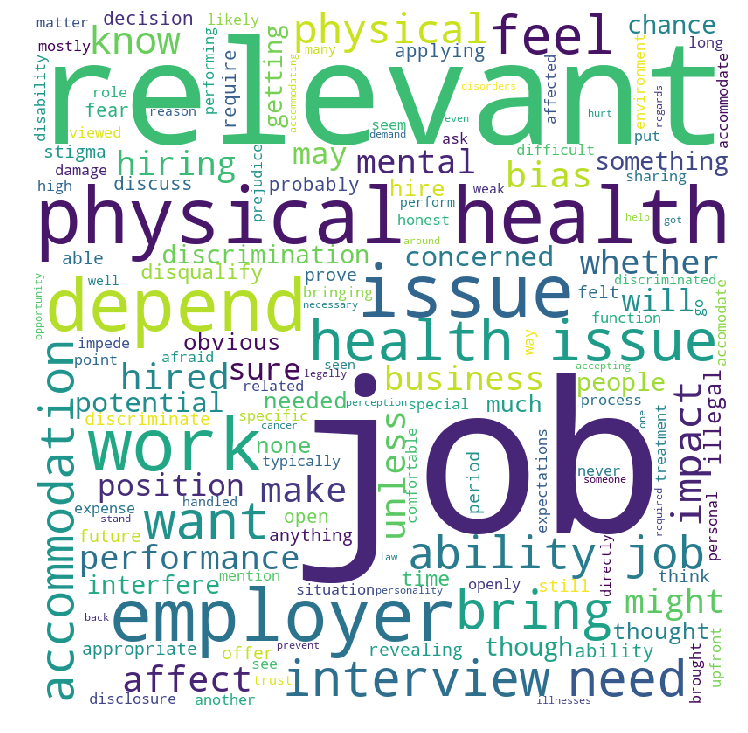

Reason of bringing up your mental health with a potential employer in an interview or not?


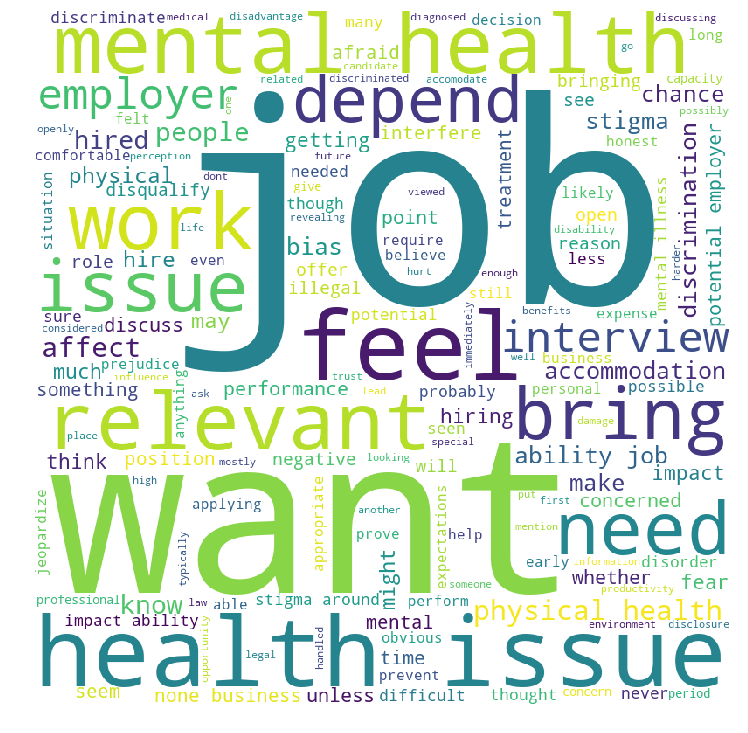

Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.


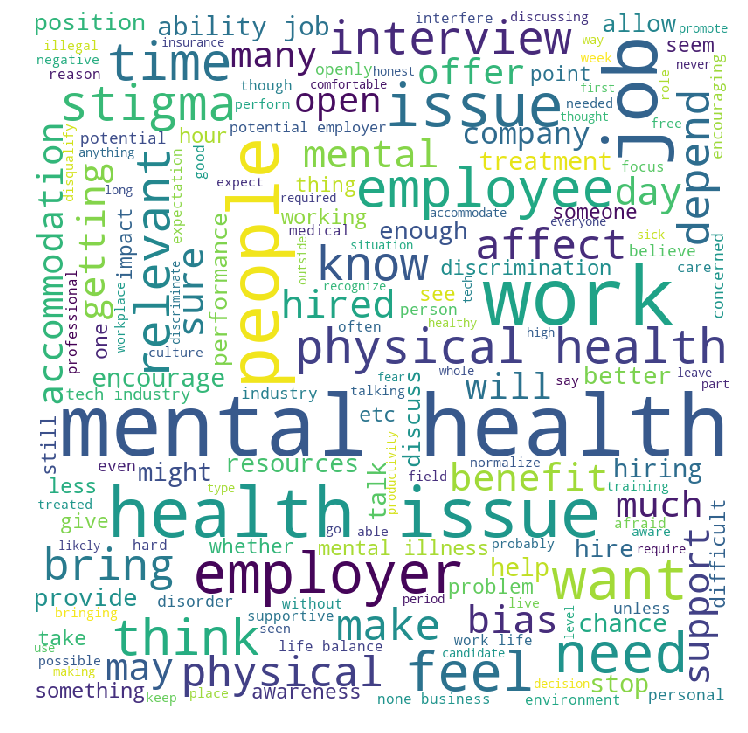

In [44]:
word_cloud(df, short_answers)